#XG Boost model - Titanic Survival Dataset

Data source - https://www.kaggle.com/competitions/titanic

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# Import Dataset
data = pd.read_csv("drive/My Drive/Colab Notebooks/Titanic_Survival.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Null entries?
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Filling in na values
data["Age"].fillna(data["Age"].median(),inplace=True)
data["Cabin"].fillna("ab",inplace=True)
data["Embarked"].fillna("S",inplace=True)

In [ ]:
# For demonstration purposes we will not use all the features here.
# We will drop unwanted columns and encode the categorical features to numerical.

dt = pd.get_dummies(data[['Pclass','Embarked','Sex','SibSp']])

In [ ]:
dt['Age'] = data['Age']

In [ ]:
dt.head(2)

,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age
0,3,1,0,0,1,0,1,22.0
1,1,1,1,0,0,1,0,38.0


In [ ]:
# Split X and y
X = dt.copy()
y = data['Survived']
print(X.shape, y.shape)

(891, 8) (891,)


In [ ]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# Model Building
xgb = XGBClassifier(random_state=42)

In [ ]:
# Define parameters for tuning as 'cv_params'
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring=scoring,
                      cv = 10,
                      refit = 'f1'
                     )

In [ ]:
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring={'f1', 'recall', 'accuracy', 'precision'})

In [ ]:
# Using pickle to save the trained model
pkl.dump(xgb_cv, open('xgb_cv.sav','wb'))

In [ ]:
# Result and Evaluation

y_pred = xgb_cv.predict(X_test)

In [ ]:
# 1. Print your accuracy score.
ac_score = accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.
pc_score = precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.
rc_score = recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.
f1_score = f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.8171641791044776
precision score: 0.8369565217391305
recall score: 0.6936936936936937
f1 score: 0.7586206896551725


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


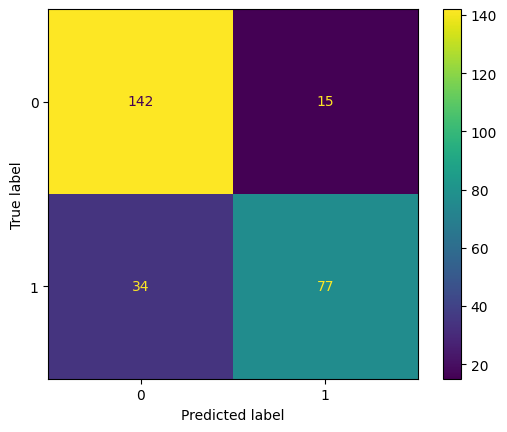

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

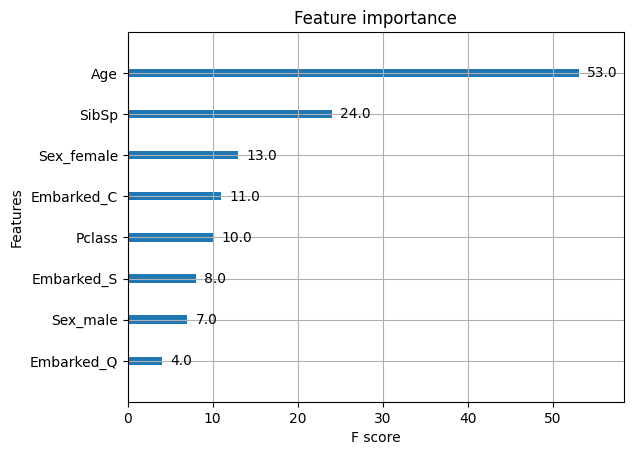

In [ ]:
# Plot the relative feature importance of the predictor variables in your model.

plot_importance(xgb_cv.best_estimator_)